In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def psi_rbf(diff, bandwidth):
    return np.exp(-(diff / bandwidth) ** 2)

def delta_rbf(dmarg, bandwidth):
    return np.sqrt(2 * (1 - psi_rbf(diff=dmarg, bandwidth=bandwidth)))

def delta_inv_rbf(gmarg, bandwidth):
    return bandwidth * np.sqrt(-np.log(1 - 0.5 * gmarg ** 2))

In [3]:
def psi_laplace(diff, bandwidth):
    return np.exp(-diff / bandwidth)

def delta_laplace(dmarg, bandwidth):
    return np.sqrt(2 * (1 - psi_laplace(diff=dmarg, bandwidth=bandwidth)))

def delta_inv_laplace(gmarg, bandwidth):
    return - bandwidth * np.log(1 - 0.5 * gmarg ** 2)

Text(0.5, 1.0, 'Lower bound of data-margin by geometric-margin')

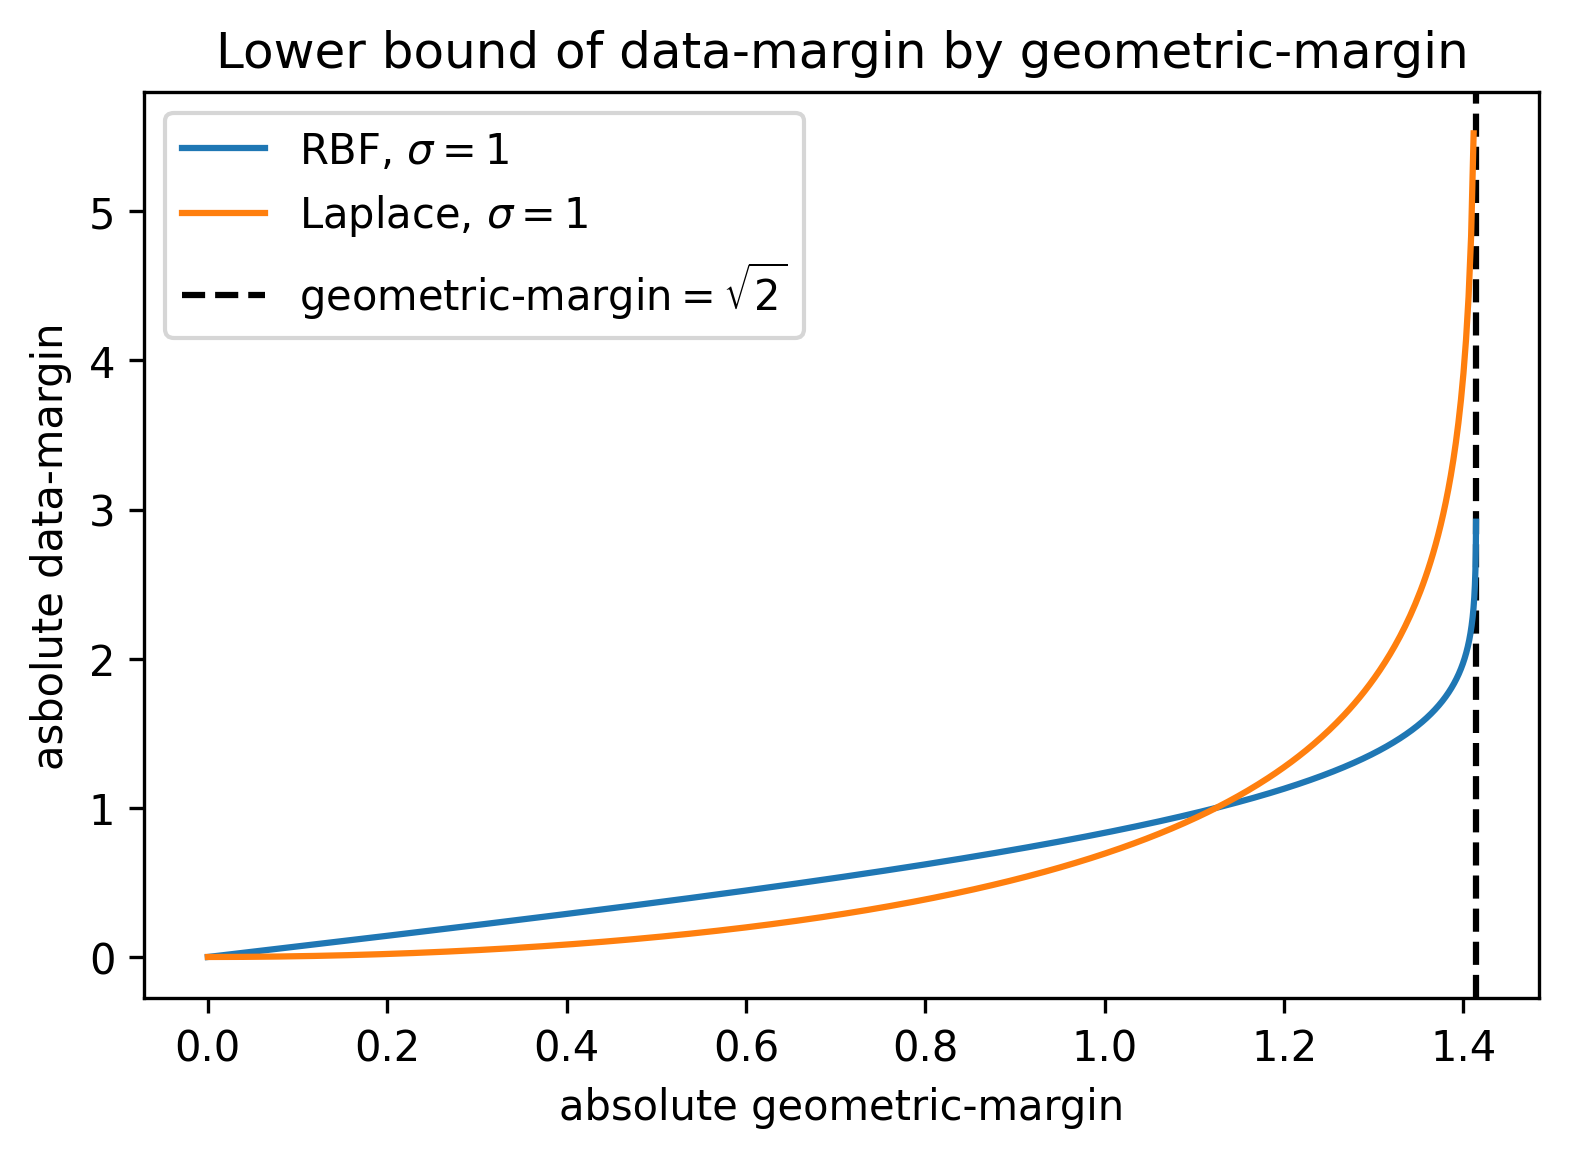

In [5]:
plt.figure(dpi=300)

BW=1

gmargs = np.linspace(0, np.sqrt(2), num=10000, endpoint=False)
delta_inv_gmargs = delta_inv_rbf(gmargs, bandwidth=BW)
plt.plot(gmargs, delta_inv_gmargs, label=f"RBF, $\sigma={BW}$")

# Check inverse
# dmargs = np.linspace(0, 10, num=1000)
# delta_dmargs = delta_rbf(dmargs, bandwidth=10)
# plt.plot(delta_dmargs, dmargs, linestyle="-.", color="red")

gmargs = np.linspace(0, np.sqrt(2), num=500, endpoint=False)
delta_inv_gmargs = delta_inv_laplace(gmargs, bandwidth=BW)
plt.plot(gmargs, delta_inv_gmargs, label=f"Laplace, $\sigma={BW}$")

# Check inverse
# dmargs = np.linspace(0, 10, num=1000)
# delta_dmargs = delta_laplace(dmargs, bandwidth=10)
# plt.plot(delta_dmargs, dmargs, linestyle="-.", color="red")

plt.axvline(np.sqrt(2), color="black", linestyle="--", zorder=-10,
            label="geometric-margin$= \sqrt{2}$")

plt.xlabel("absolute geometric-margin")
plt.ylabel("asbolute data-margin")
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1);
plt.title("Lower bound of data-margin by geometric-margin")